In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
fruits = pd.read_excel('data/fruits.xlsx')
fruits.shape

(60, 4)

In [4]:
fruits

,Color,Sphericity,Weight,labels
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange
5,Orange,0.911,130,Orange
6,Orange,0.903,135,Orange
7,Orange,0.918,105,Orange
8,Orange,0.914,132,Orange
9,Orange,0.936,127,Orange


In [5]:
fruits.labels.value_counts()

Orange    30
Apple     30
Name: labels, dtype: int64

In [6]:
fruits.Color.value_counts()

Green              20
Orange             10
Greenish yellow    10
Reddish yellow     10
Red                10
Name: Color, dtype: int64

In [7]:
fruits.groupby(['Color','labels']).size()

Color            labels
Green            Apple     10
                 Orange    10
Greenish yellow  Orange    10
Orange           Orange    10
Red              Apple     10
Reddish yellow   Apple     10
dtype: int64

In [8]:
fruits[['Sphericity','Weight']].describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


In [11]:
fruits.groupby(['labels']).describe()[['Sphericity','Weight']]

Sphericity                                                             \
            count      mean       std    min     25%     50%      75%    max   
labels                                                                         
Apple        30.0  0.768133  0.042097  0.710  0.7285  0.7625  0.80250  0.845   
Orange       30.0  0.873033  0.042740  0.808  0.8350  0.8710  0.91325  0.947   

       Weight                                                             
        count        mean        std    min    25%    50%     75%    max  
labels                                                                    
Apple    30.0  161.966667  12.075862  140.0  152.5  164.0  171.50  184.0  
Orange   30.0  123.533333  14.129288  101.0  110.0  124.0  133.75  149.0

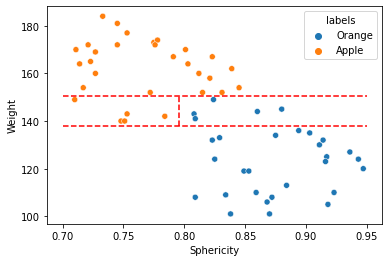

In [37]:
sns.scatterplot(x='Sphericity',y='Weight',data=fruits,hue='labels')
plt.plot([0.70,0.95],[138,138],c='red',ls='--')
plt.plot([0.70,0.95],[150.5,150.5],c='red',ls='--')
plt.plot([0.796,0.796],[138,150.5],c='red',ls='--')

plt.show()

In [14]:
X = fruits[['Sphericity','Weight']]
y = fruits['labels']

In [39]:
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [40]:
results = export_text(clf,feature_names=['Sphericity','Weight'])
print(results)

|--- Weight <= 138.00
|   |--- class: Orange
|--- Weight >  138.00
|   |--- Weight <= 150.50
|   |   |--- Sphericity <= 0.80
|   |   |   |--- class: Apple
|   |   |--- Sphericity >  0.80
|   |   |   |--- class: Orange
|   |--- Weight >  150.50
|   |   |--- class: Apple



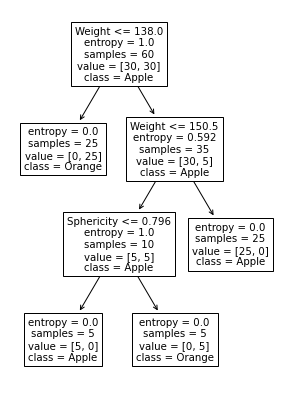

In [41]:
plt.figure(figsize=[5,7])
plot_tree(clf,feature_names=['Sphericity','Weight'],class_names=['Apple','Orange'])
plt.show()

In [38]:
-9/14*np.log2(9/14)-5/14*np.log2(5/14)

0.9402859586706311

In [42]:
X.shape,y.shape

((60, 2), (60,))

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [90]:
X_train.shape,X_test.shape

((45, 2), (15, 2))

In [91]:
y_test.value_counts()

Orange    11
Apple      4
Name: labels, dtype: int64

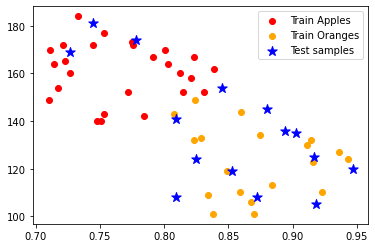

In [92]:
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apples')
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Oranges')
plt.scatter(x='Sphericity',y='Weight',data=X_test,c='blue',label='Test samples',marker='*',s=100)
plt.legend()
plt.show()


In [93]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

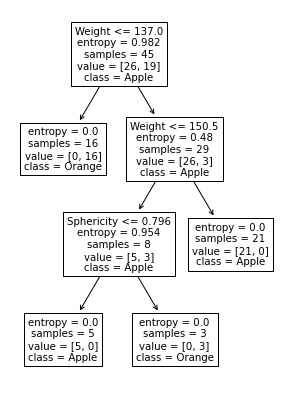

In [94]:
plt.figure(figsize=[5,7])
plot_tree(clf,feature_names=['Sphericity','Weight'],class_names=['Apple','Orange'])
plt.show()

In [95]:
y_predict = clf.predict(X_test)
y_predict

array(['Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange',
       'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange',
       'Orange'], dtype=object)

In [96]:
y_test.values

array(['Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange',
       'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange',
       'Orange'], dtype=object)

In [72]:
13/15

0.8666666666666667

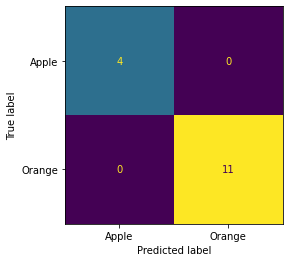

In [97]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm = confusion_matrix(y_test,y_predict)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=['Apple','Orange'])
cm_disp.plot(colorbar=False)
plt.show()

In [87]:
accuracy_score(y_test,y_predict)

0.8666666666666667

In [98]:
wisc = pd.read_csv('data/wisc_bc_data.csv')
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [99]:
wisc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
wisc.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [113]:
X = wisc[['radius_worst','concave points_worst']]
y = wisc['diagnosis']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape,X_test.shape

((426, 2), (143, 2))

In [133]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.951048951048951

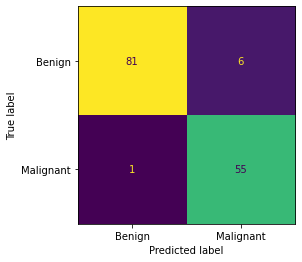

In [134]:
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=['Benign','Malignant'])
cm_disp.plot(colorbar=False)
plt.show()

In [128]:
from sklearn.metrics import cohen_kappa_score,precision_score,recall_score,f1_score,accuracy_score
52/55,52/56,2*0.9454545454545454*0.9285714285714286/(0.9454545454545454+0.9285714285714286)

(0.9454545454545454, 0.9285714285714286, 0.9369369369369368)

In [129]:
print('accuracy score:',accuracy_score(y_test,y_predict))
print('Kappa score:',cohen_kappa_score(y_test,y_predict))
print('Precision:',precision_score(y_test,y_predict,pos_label='M'))
print('Recall:',recall_score(y_test,y_predict,pos_label='M'))
print('f Measure:',f1_score(y_test,y_predict,pos_label='M'))


accuracy score: 0.951048951048951
Kappa score: 0.8969422423556059
Precision: 0.9454545454545454
Recall: 0.9285714285714286
f Measure: 0.9369369369369368


In [136]:
clf.get_depth(),clf.get_n_leaves()

(2, 4)

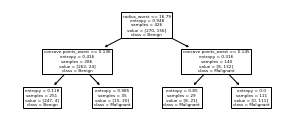

In [140]:
plt.figure(figsize=[5,2])
plot_tree(clf,feature_names=X.columns,class_names=['Benign','Malignant'])
plt.show()

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,criterion='entropy')
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.9440559440559441

In [144]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.951048951048951

In [147]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)